In [1]:
import  pyanalisi as pa
import numpy as np

cite as:
Riccardo Bertossa, analisi
https://github.com/rikigigi/analisi
(c) 2017-2022
COMPILED AT May 16 2022 22:30:09 by /usr/bin/c++ whith flags (Release) -O3 -DNDEBUG -O3 (Debug)  -g -DEIGEN_INITIALIZE_MATRICES_BY_NAN    -fsanitize=leak -fsanitize=undefined (build type was Release) on a Linux-5.15.32-gentoo-r1 whith processor x86_64
With python support: /usr/lib64/libpython3.9.so
With gromacs XDR file conversion support
v0.5.0


In [2]:
traj=pa.Traj('../tests/data/lammps.bin')

Trajectory file size "../tests/data/lammps.bin": 29349104
Types and ids of atoms:
0 :	id = 0	type = 0	type_index = 0
1 :	id = 1	type = 0	type_index = 0
2 :	id = 2	type = 0	type_index = 0
3 :	id = 3	type = 0	type_index = 0
4 :	id = 4	type = 0	type_index = 0
5 :	id = 5	type = 0	type_index = 0
6 :	id = 6	type = 0	type_index = 0
7 :	id = 7	type = 0	type_index = 0
8 :	id = 8	type = 0	type_index = 0
9 :	id = 9	type = 0	type_index = 0
10 :	id = 10	type = 0	type_index = 0
11 :	id = 11	type = 0	type_index = 0
12 :	id = 12	type = 0	type_index = 0
13 :	id = 13	type = 0	type_index = 0
14 :	id = 14	type = 0	type_index = 0
15 :	id = 15	type = 0	type_index = 0
16 :	id = 16	type = 0	type_index = 0
17 :	id = 17	type = 0	type_index = 0
18 :	id = 18	type = 0	type_index = 0
19 :	id = 19	type = 0	type_index = 0
20 :	id = 20	type = 0	type_index = 0
21 :	id = 21	type = 0	type_index = 0
22 :	id = 22	type = 0	type_index = 0
23 :	id = 23	type = 0	type_index = 0
24 :	id = 24	type = 0	type_index = 0
25 :	id = 25	

In [3]:
traj.getNtimesteps()
traj.setWrapPbc(True)

In [4]:
traj.setAccessWindowSize(traj.getNtimesteps())
traj.setAccessStart(0)

Setting trajectory access from timestep 0 to timestep 7958 (excluded).
Applying periodic boundary conditions.
Reading time: 0.022706s.


1

In [5]:
msd,gofr,sh=pa.analyze(traj,traj,0,1000,
                    startr_sh=1.0,endr_sh=2.5,
                    nthreads=4
                   )

calculating msd...
calculating g(r)...
calculating spherical harmonics correlation functions... (go away and have a coffee)


Buffer miss/hit: 

all done


1625/23375


(<Figure size 3000x2400 with 1 Axes>,
 <AxesSubplot:title={'center':'$g(r)$'}, xlabel='$\\AA$', ylabel='number of atoms in the shell / volume of the shell'>)

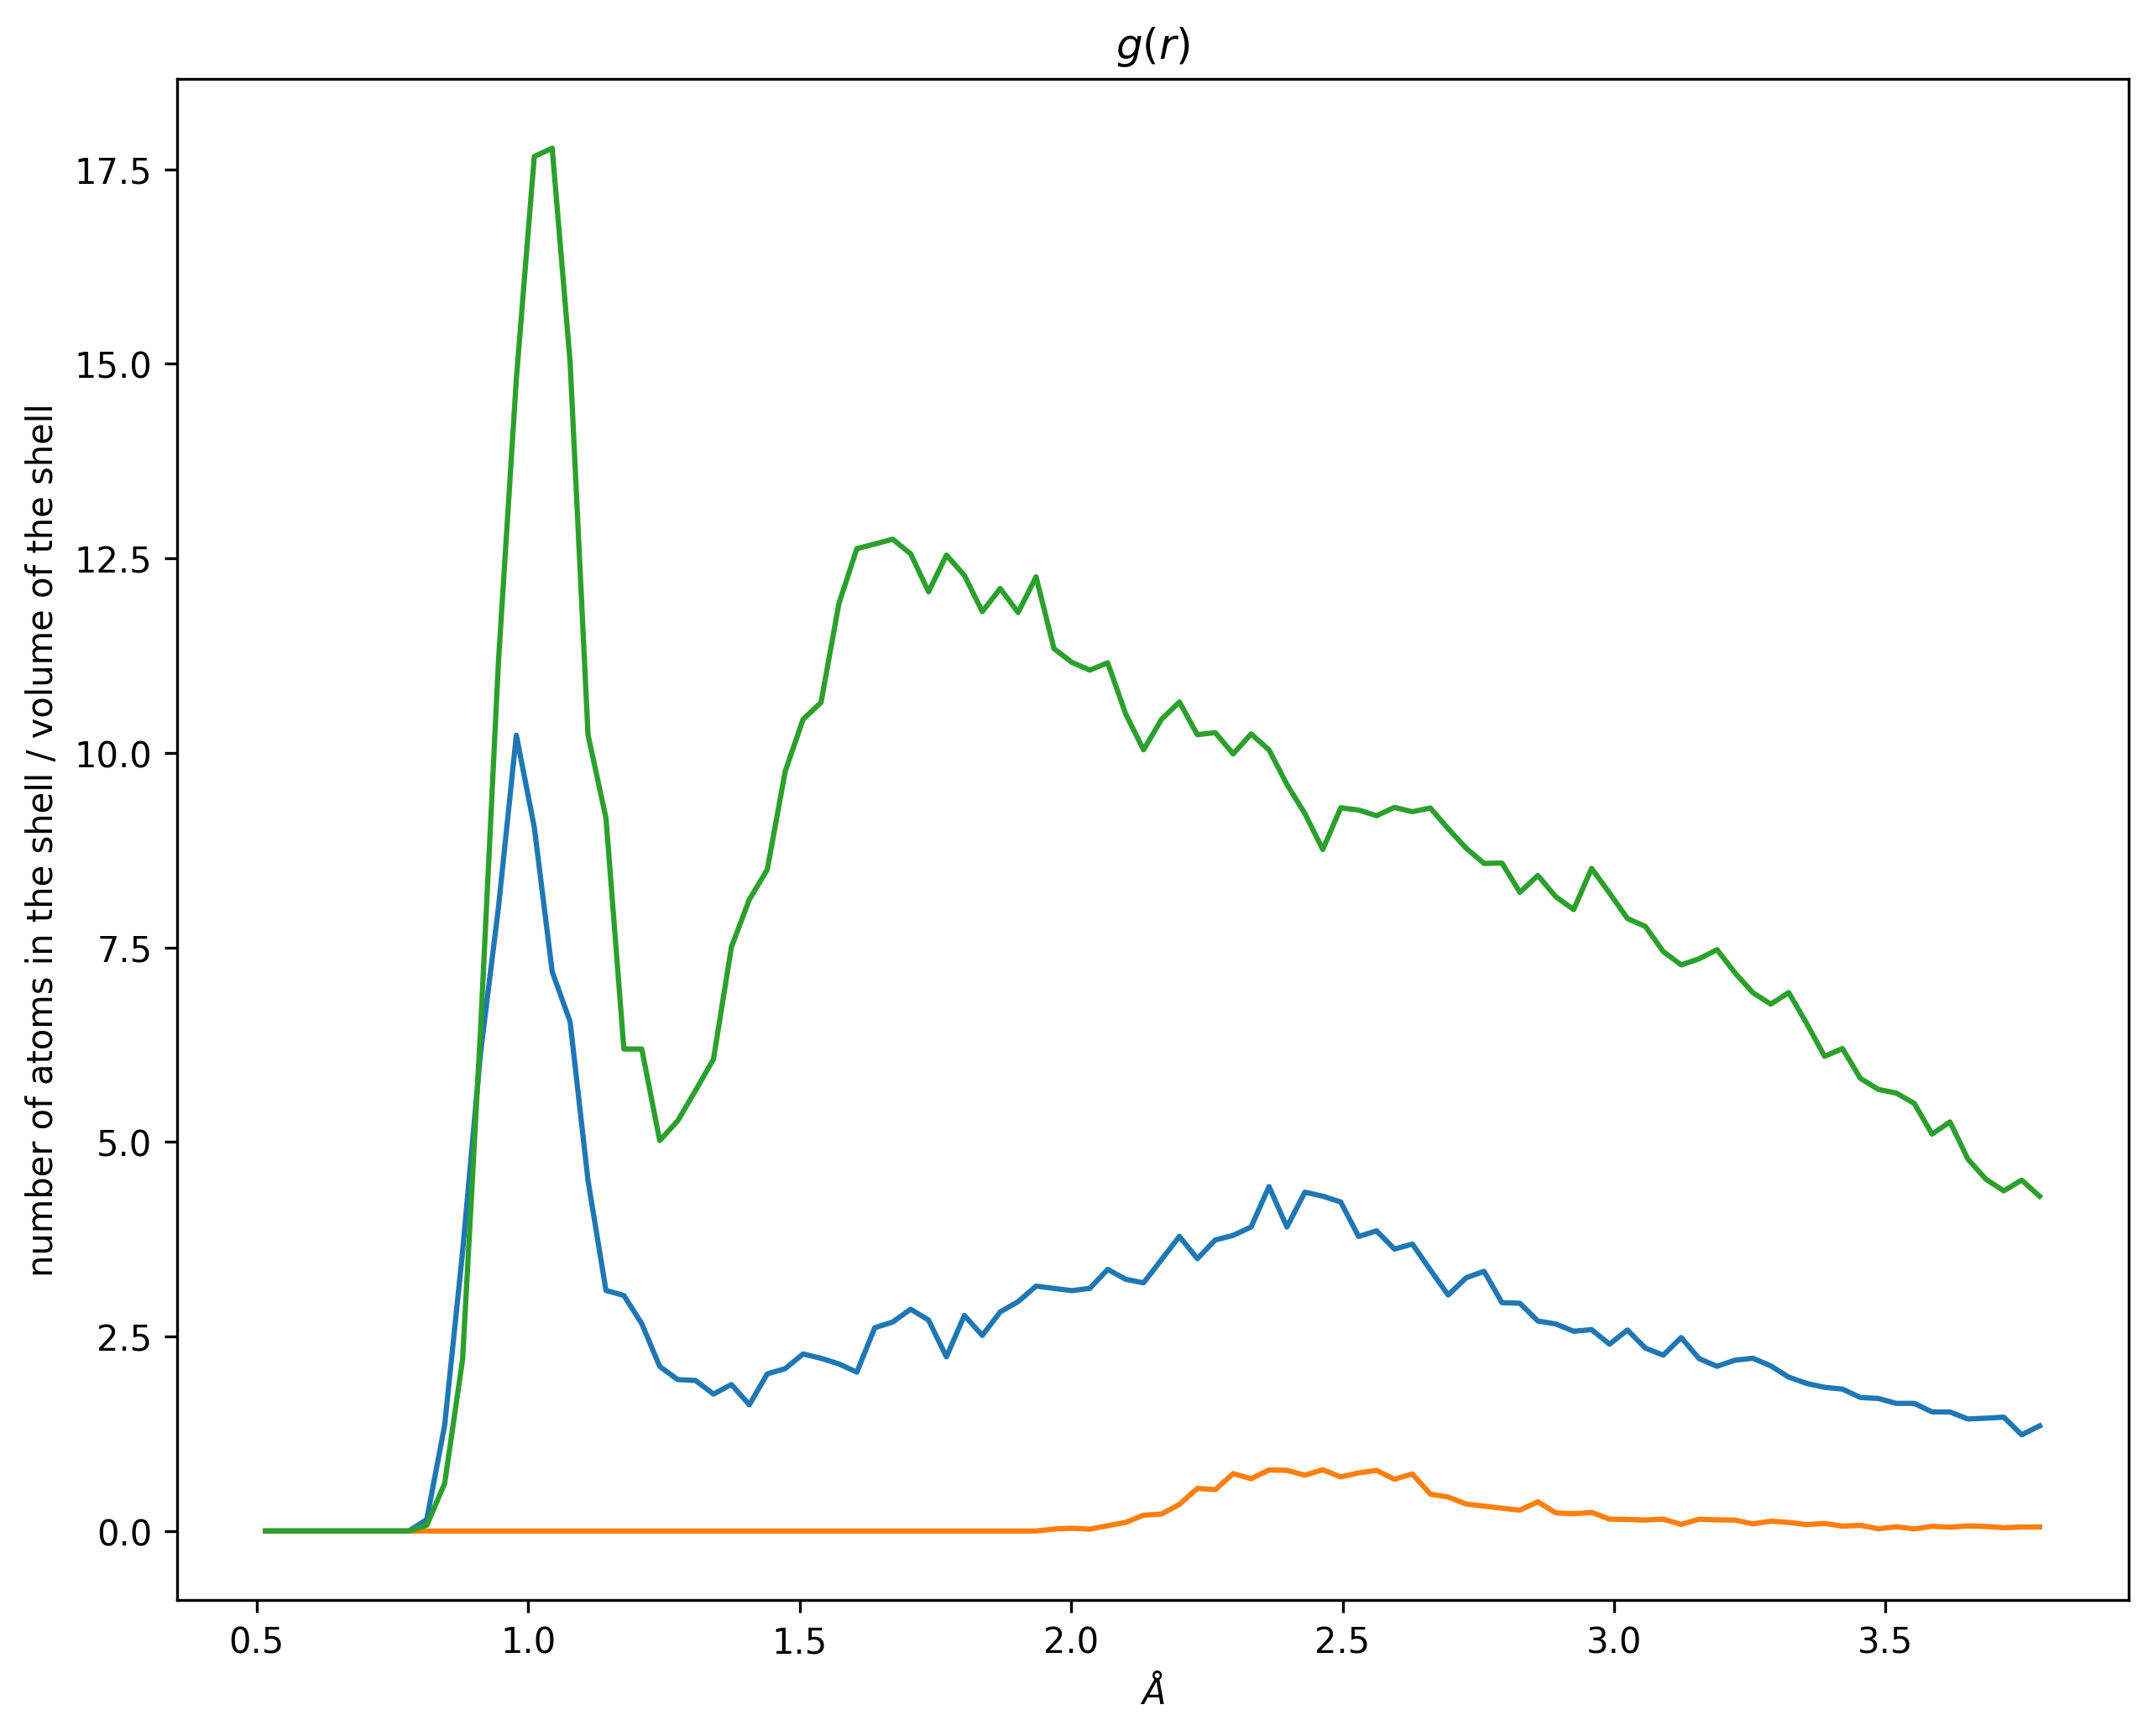

In [6]:
pa.plot_gofr(0.5,3.8,gofr)

In [7]:
times=np.arange(msd.shape[0])*50*2.4e-5

(<Figure size 3000x2400 with 2 Axes>,
 <Axes:title={'center':'MSD'}, xlabel='time (ps)', ylabel='$\\AA^2/ps$'>)

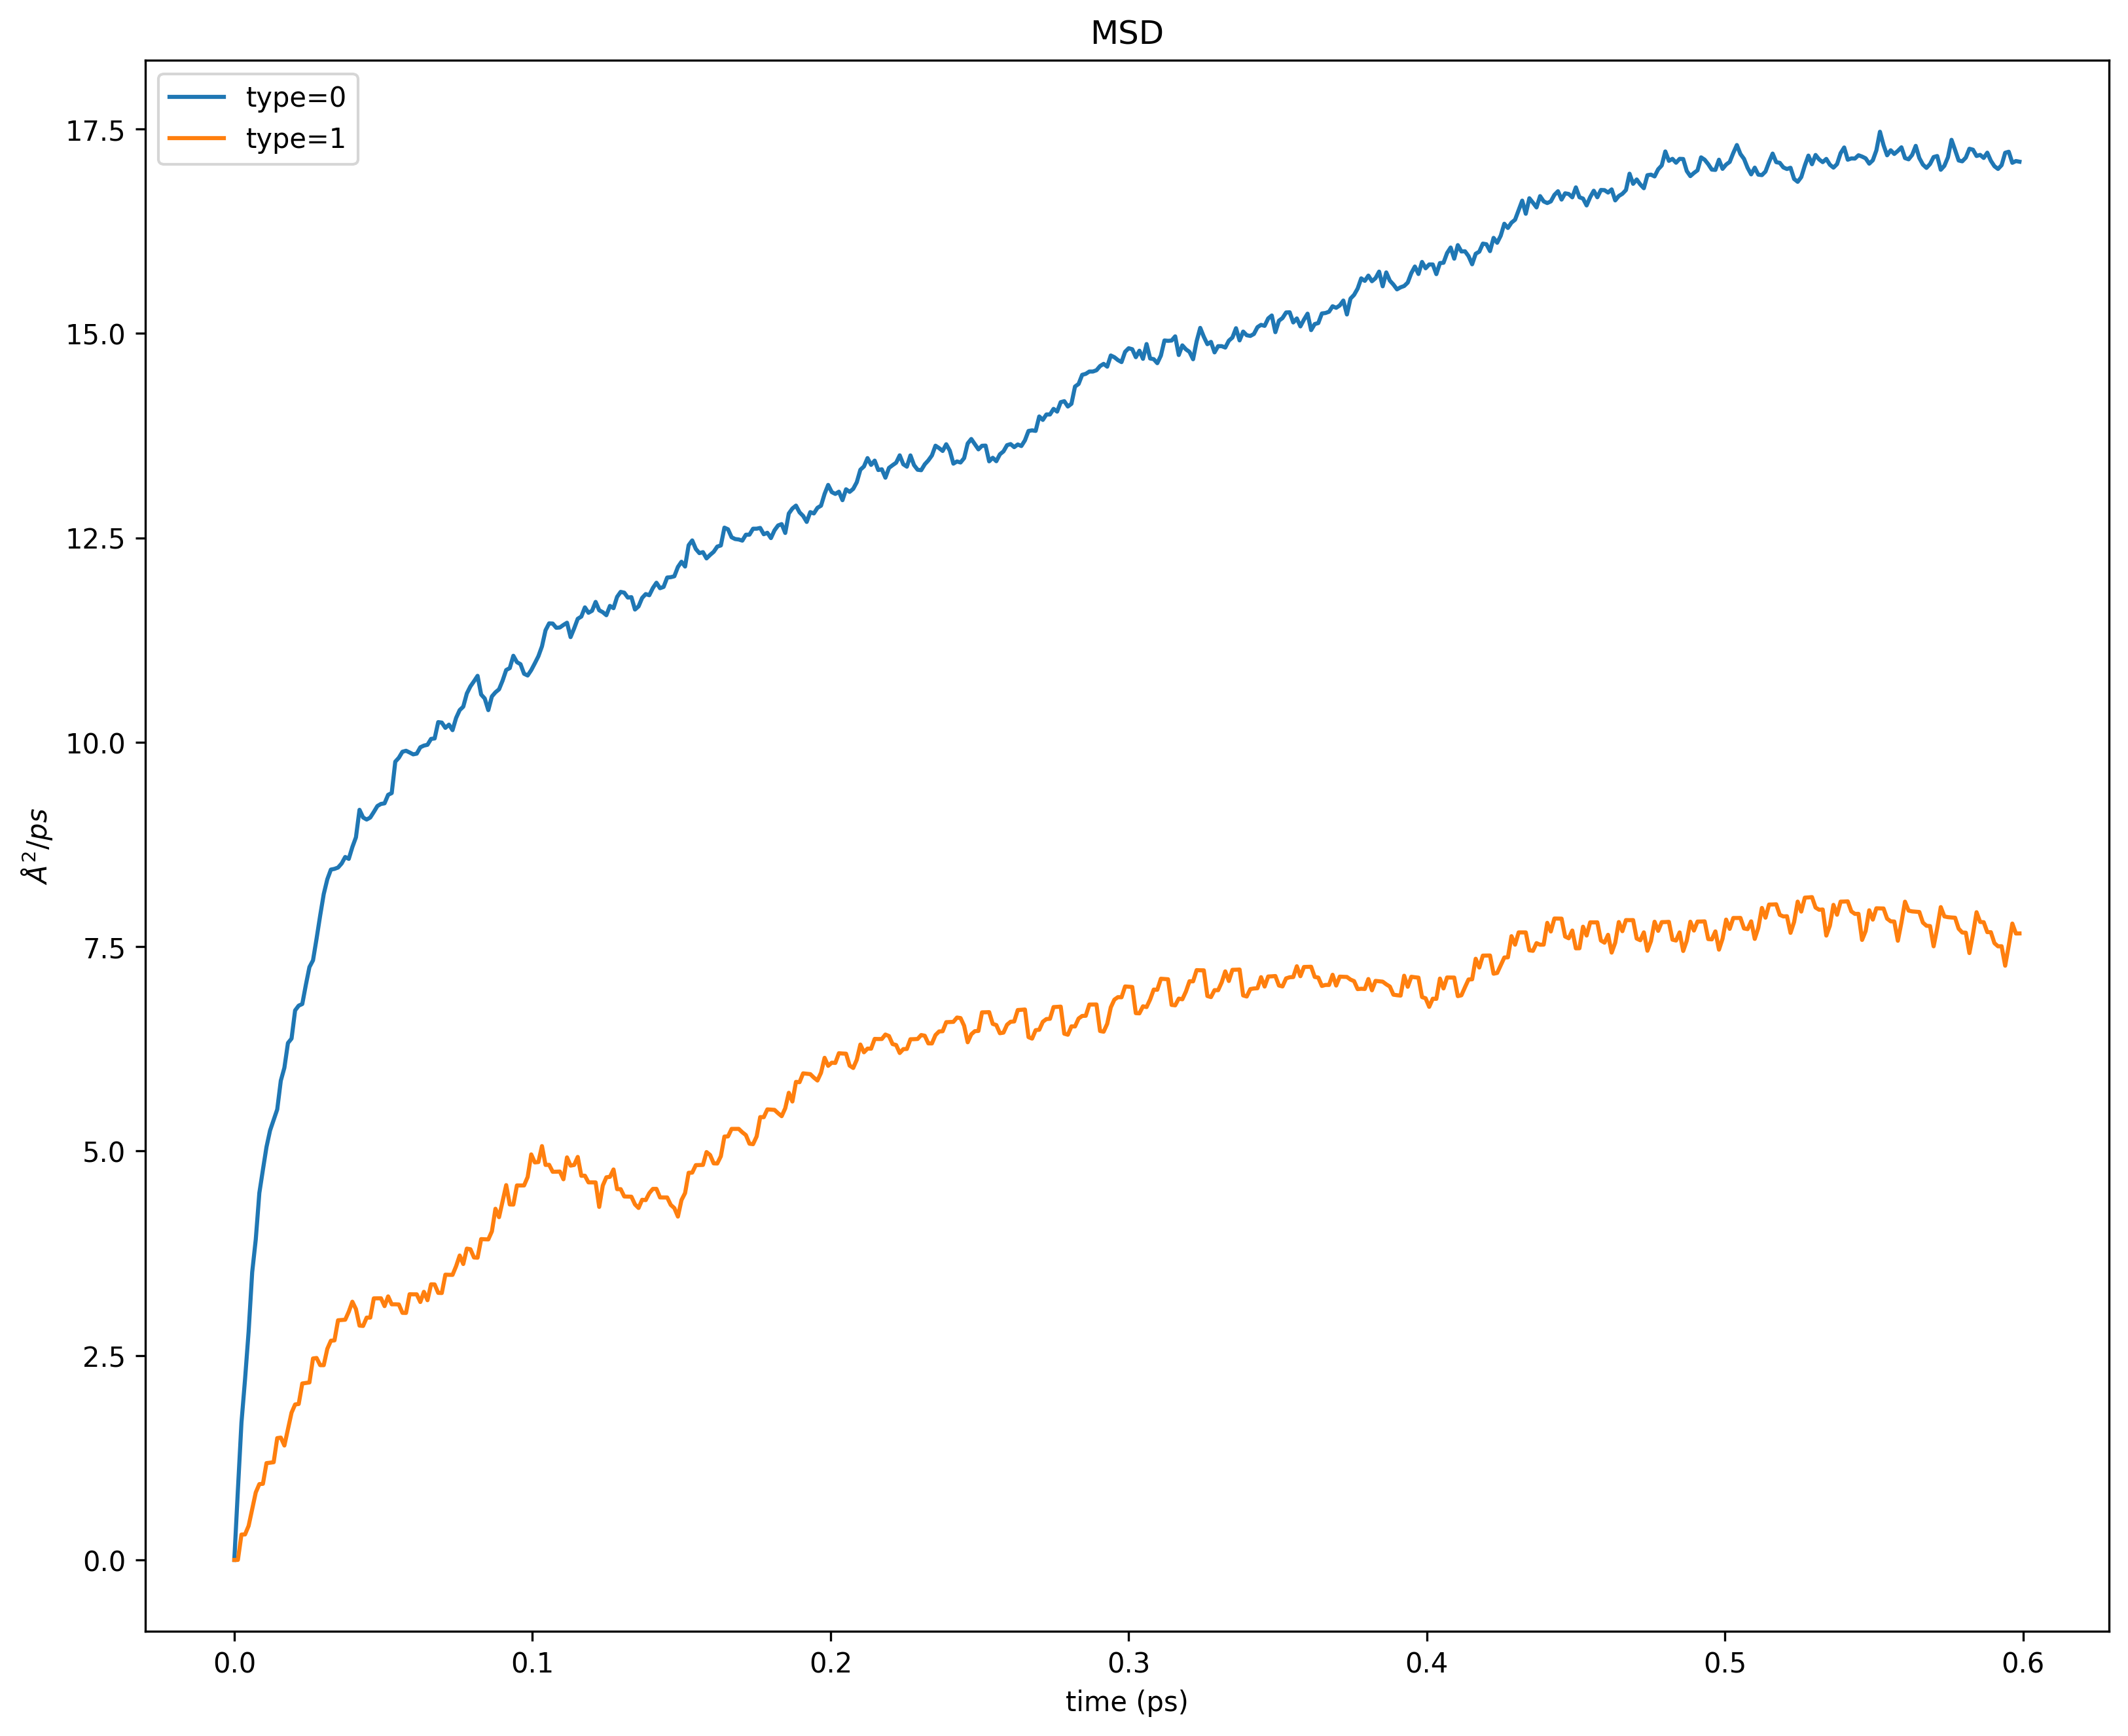

In [8]:
pa.plot_msd(times,msd,0)

In [9]:
density=pa.atomic_density(traj)
pa.density_field(*density)

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

In [10]:
density_g=pa.fft_density(density[0])

In [11]:
pa.density_field(density_g,density[1])

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

fit from 0.0 (1) to 0.5988 (500)
l=0: 12.433582041696598
pre-fit from 0.0 (1) to 0.4 (334)
l=1: 1.4279652045257778
pre-fit from 0.0 (1) to 0.4 (334)
l=2: 2.2531234938929385
pre-fit from 0.0 (1) to 0.4 (334)
l=3: 3.896014095022009
pre-fit from 0.0 (1) to 0.4 (334)
l=4: 6.257203318524437
pre-fit from 0.0 (1) to 0.4 (334)
l=5: 9.925294447194892
pre-fit from 0.0 (1) to 0.4 (334)
l=6: 13.285345446757074
pre-fit from 0.0 (1) to 0.4 (334)
l=7: 15.049611154808414
pre-fit from 0.0 (1) to 0.4 (334)
l=8: 16.718411181159894
pre-fit from 0.0 (1) to 0.4 (334)
l=9: 19.03662785216888
pre-fit from 0.0 (1) to 0.4 (334)
l=10: 20.247895345140083
pre-fit from 0.0 (1) to 0.4 (334)


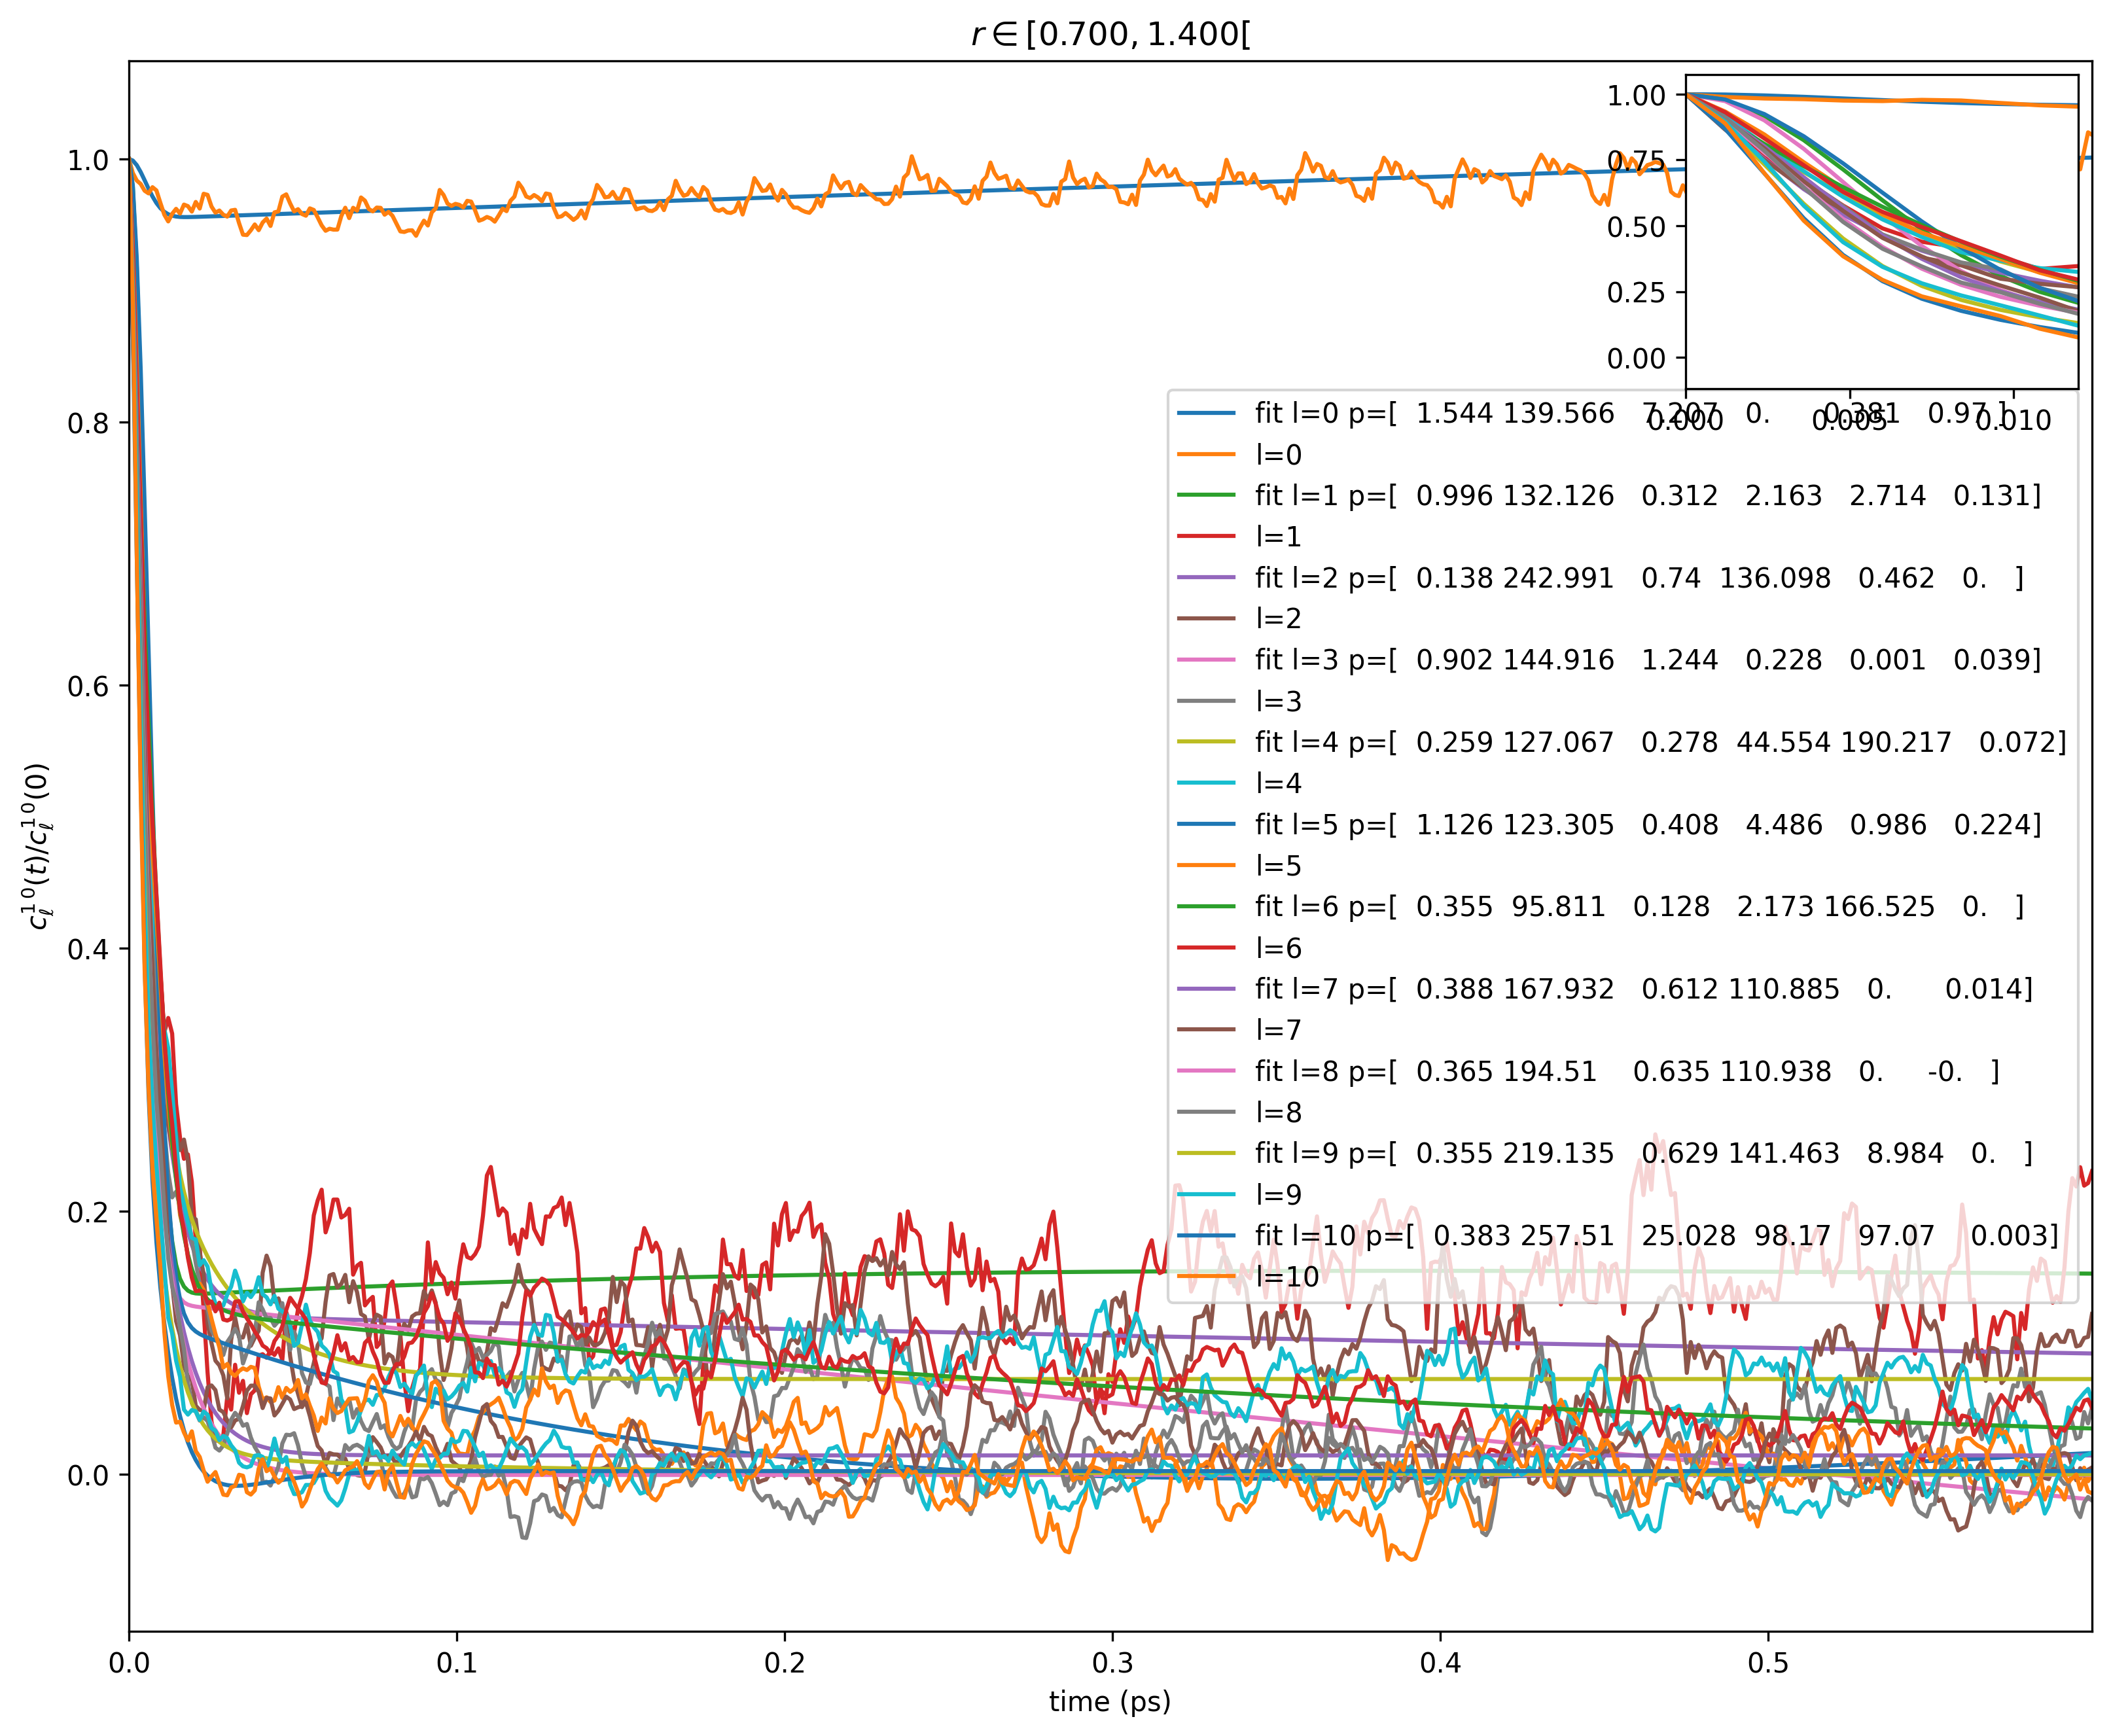

In [12]:
shp=pa.plot_sh(0.7,1.4,times,sh,1,0,0,log=False,pre_fit=0.4)